<a href="https://colab.research.google.com/github/ayoni02/zummit-F-group2/blob/main/R%26D_group_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df=pd.read_csv('toxic_dataset.csv')

In [90]:
#the basics
"""pipeline('zero-shot-classification', model=model)
labels = ["TOXIC", "AGGRESSIVE", "HATE SPEECH", "INSULTIVE", "SPAM", "NSFW", "SEXUAL HARASSMENT", "NEUTRAL"]"""

'pipeline(\'zero-shot-classification\', model=model)\nlabels = ["TOXIC", "AGGRESSIVE", "HATE SPEECH", "INSULTIVE", "SPAM", "NSFW", "SEXUAL HARASSMENT", "NEUTRAL"]'

In [91]:
#['AlbertForSequenceClassification', 'BartForSequenceClassification', 'BertForSequenceClassification', 'BigBirdForSequenceClassification', 'BigBirdPegasusForSequenceClassification', 'BioGptForSequenceClassification', 'BloomForSequenceClassification', 'CamembertForSequenceClassification', 'CanineForSequenceClassification', 'LlamaForSequenceClassification', 'ConvBertForSequenceClassification', 'CTRLForSequenceClassification', 'Data2VecTextForSequenceClassification', 'DebertaForSequenceClassification', 'DebertaV2ForSequenceClassification', 'DistilBertForSequenceClassification', 'ElectraForSequenceClassification', 'ErnieForSequenceClassification', 'ErnieMForSequenceClassification', 'EsmForSequenceClassification', 'FalconForSequenceClassification', 'FlaubertForSequenceClassification', 'FNetForSequenceClassification', 'FunnelForSequenceClassification', 'GPT2ForSequenceClassification', 'GPT2ForSequenceClassification', 'GPTBigCodeForSequenceClassification', 'GPTNeoForSequenceClassification', 'GPTNeoXForSequenceClassification', 'GPTJForSequenceClassification', 'IBertForSequenceClassification', 'LayoutLMForSequenceClassification', 'LayoutLMv2ForSequenceClassification', 'LayoutLMv3ForSequenceClassification', 'LEDForSequenceClassification', 'LiltForSequenceClassification', 'LlamaForSequenceClassification', 'LongformerForSequenceClassification', 'LukeForSequenceClassification', 'MarkupLMForSequenceClassification', 'MBartForSequenceClassification', 'MegaForSequenceClassification', 'MegatronBertForSequenceClassification', 'MistralForSequenceClassification', 'MobileBertForSequenceClassification', 'MPNetForSequenceClassification', 'MptForSequenceClassification', 'MraForSequenceClassification', 'MT5ForSequenceClassification', 'MvpForSequenceClassification', 'NezhaForSequenceClassification', 'NystromformerForSequenceClassification', 'OpenLlamaForSequenceClassification', 'OpenAIGPTForSequenceClassification', 'OPTForSequenceClassification', 'PerceiverForSequenceClassification', 'PersimmonForSequenceClassification', 'PLBartForSequenceClassification', 'QDQBertForSequenceClassification', 'ReformerForSequenceClassification', 'RemBertForSequenceClassification', 'RobertaForSequenceClassification', 'RobertaPreLayerNormForSequenceClassification', 'RoCBertForSequenceClassification', 'RoFormerForSequenceClassification', 'SqueezeBertForSequenceClassification', 'T5ForSequenceClassification', 'TapasForSequenceClassification', 'TransfoXLForSequenceClassification', 'UMT5ForSequenceClassification', 'XLMForSequenceClassification', 'XLMRobertaForSequenceClassification', 'XLMRobertaXLForSequenceClassification', 'XLNetForSequenceClassification', 'XmodForSequenceClassification', 'YosoForSequenceClassification']

In [92]:
#const labels
labels = ["TOXIC", "AGGRESSIVE", "HATE SPEECH", "INSULTIVE", "SPAM", "NSFW", "SEXUAL HARASSMENT", "NEUTRAL", "POSITIVE"]

# test with facebook bart

In [93]:
fbbert = pipeline('zero-shot-classification', model='facebook/bart-large-mnli', device=0)

In [94]:
from tqdm import tqdm
sentiment = []
for i in tqdm(df.text, total=len(df)):
    sentiment.append(fbbert(i, labels)["labels"][0])

 10%|█         | 10/100 [00:06<01:04,  1.40it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


In [97]:
fbber_df = df[['Toxicity', 'text']]
fbber_df['label'] = [0 if ((x=="NEUTRAL") or (x=="POSITIVE")) else 1 for x in sentiment]

In [98]:
print(classification_report(fbber_df.Toxicity, fbber_df.label))

              precision    recall  f1-score   support

           0       0.76      0.26      0.39        50
           1       0.55      0.92      0.69        50

    accuracy                           0.59       100
   macro avg       0.66      0.59      0.54       100
weighted avg       0.66      0.59      0.54       100



In [99]:
print(confusion_matrix(fbber_df.Toxicity, fbber_df.label))

[[13 37]
 [ 4 46]]


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

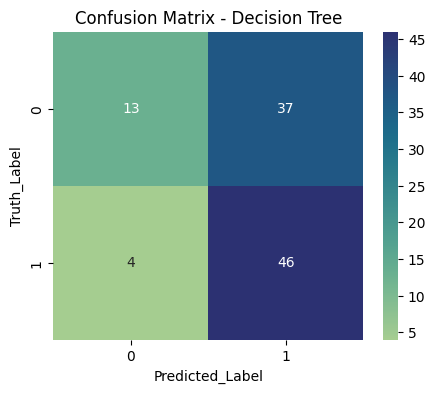

In [100]:
cm1 = confusion_matrix(fbber_df.Toxicity, fbber_df.label)
cm1
# after creating the confusion matrix, for better understaning plot the cm.
plt.figure(figsize = (5, 4))
# were 'cmap' is used to set the accent colour
sns.heatmap(cm1, annot=True, cmap= 'crest',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - FACEBOOK BERT')

In [101]:
t5 = pipeline('zero-shot-classification', model='google-t5/t5-base', tokenizer='google-t5/t5-base', device=0)

Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at google-t5/t5-base and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [102]:
sentiment = []
for i in tqdm(df.text, total=len(df)):
    sentiment.append(t5(i, labels)["labels"][0])

100%|██████████| 100/100 [01:42<00:00,  1.03s/it]


In [103]:
t5_df = df[['Toxicity', 'text']]
t5_df['label'] = [0 if ((x=="NEUTRAL") or (x=="POSITIVE")) else 1 for x in sentiment]

In [109]:
print(classification_report(t5_df.Toxicity, t5_df.label))

              precision    recall  f1-score   support

           0       0.40      0.04      0.07        50
           1       0.49      0.94      0.65        50

    accuracy                           0.49       100
   macro avg       0.45      0.49      0.36       100
weighted avg       0.45      0.49      0.36       100



In [110]:
print(confusion_matrix(t5_df.Toxicity, t5_df.label))

[[ 2 48]
 [ 3 47]]


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

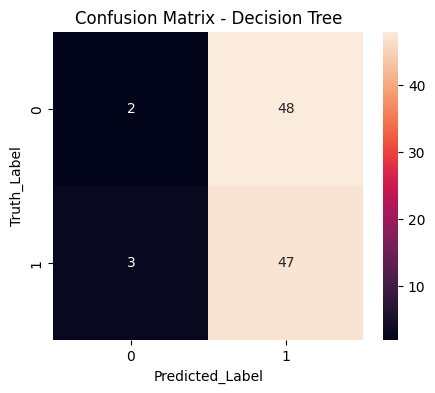

In [111]:
cm2 = confusion_matrix(t5_df.Toxicity, t5_df.label)
cm2
# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (5, 4))
# were 'cmap' is used to set the accent colour
sns.heatmap(cm2, annot=True, cmap= 'rocket',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - T5 BASE')

In [112]:
neogpt = pipeline('zero-shot-classification', model='EleutherAI/gpt-neo-1.3B', device=0)

Some weights of GPTNeoForSequenceClassification were not initialized from the model checkpoint at EleutherAI/gpt-neo-1.3B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [113]:
sentiment = []
for i in tqdm(df.text, total=len(df)):
    sentiment.append(neogpt(i, labels)["labels"][0])

100%|██████████| 100/100 [04:55<00:00,  2.95s/it]


In [114]:
neogpt_df = df[['Toxicity', 'text']]
neogpt_df['label'] = [0 if ((x=="NEUTRAL") or (x=="POSITIVE")) else 1 for x in sentiment]

In [115]:
print(classification_report(neogpt_df.Toxicity, neogpt_df.label))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        50
           1       0.51      1.00      0.67        50

    accuracy                           0.51       100
   macro avg       0.75      0.51      0.36       100
weighted avg       0.75      0.51      0.36       100



In [116]:
print(confusion_matrix(neogpt_df.Toxicity, neogpt_df.label))

[[ 1 49]
 [ 0 50]]


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

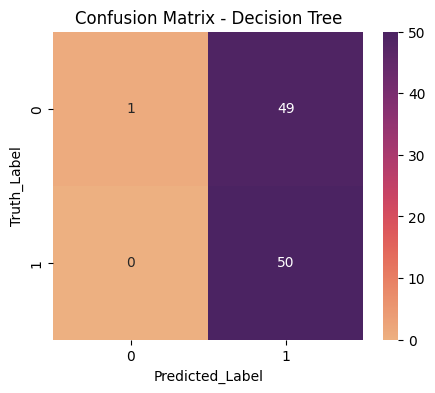

In [117]:
cm3 = confusion_matrix(neogpt_df.Toxicity, neogpt_df.label)
cm3
# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (5, 4))
# were 'cmap' is used to set the accent colour
sns.heatmap(cm3, annot=True, cmap= 'flare',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - GPT NEO')